Dimensions du dataset : (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284

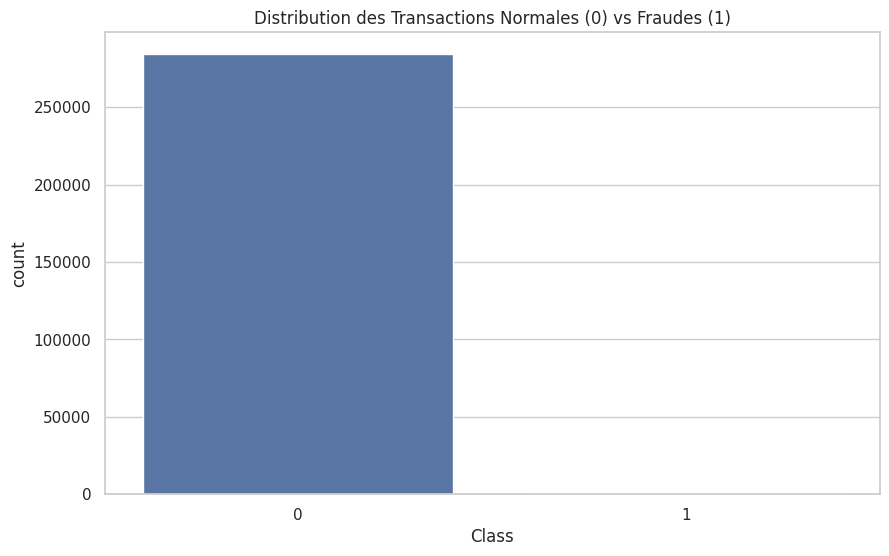

Pourcentage de transactions normales: 99.8273%
Pourcentage de fraudes: 0.1727%


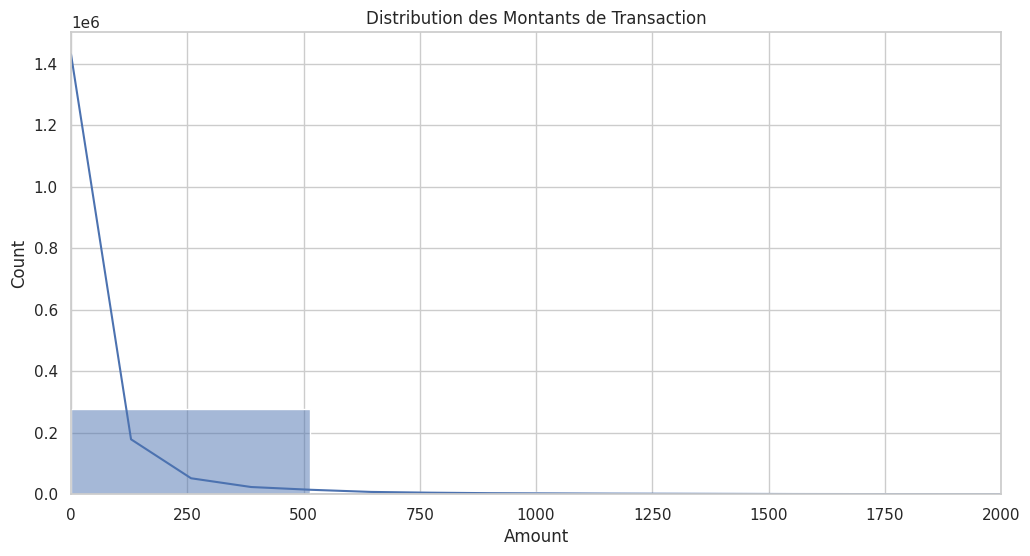

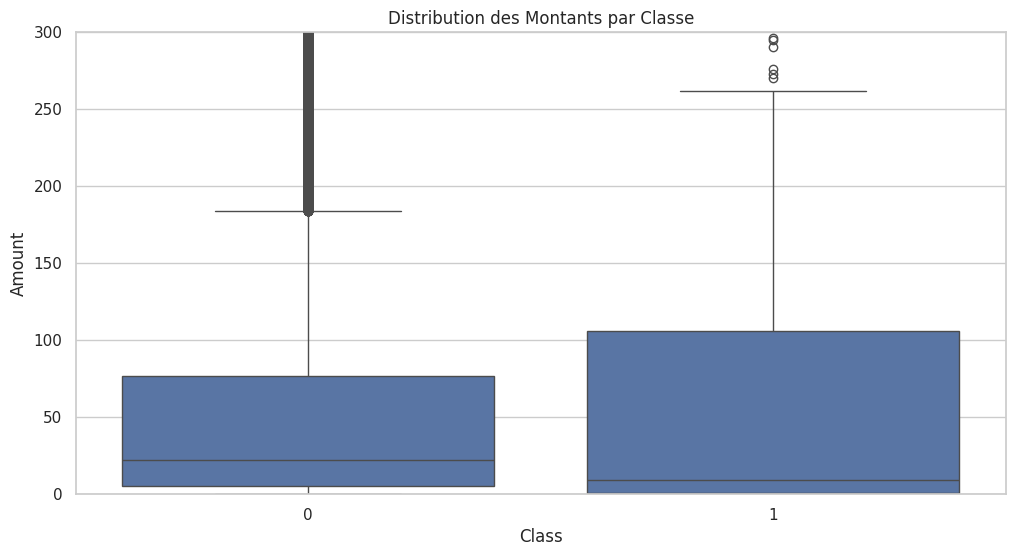

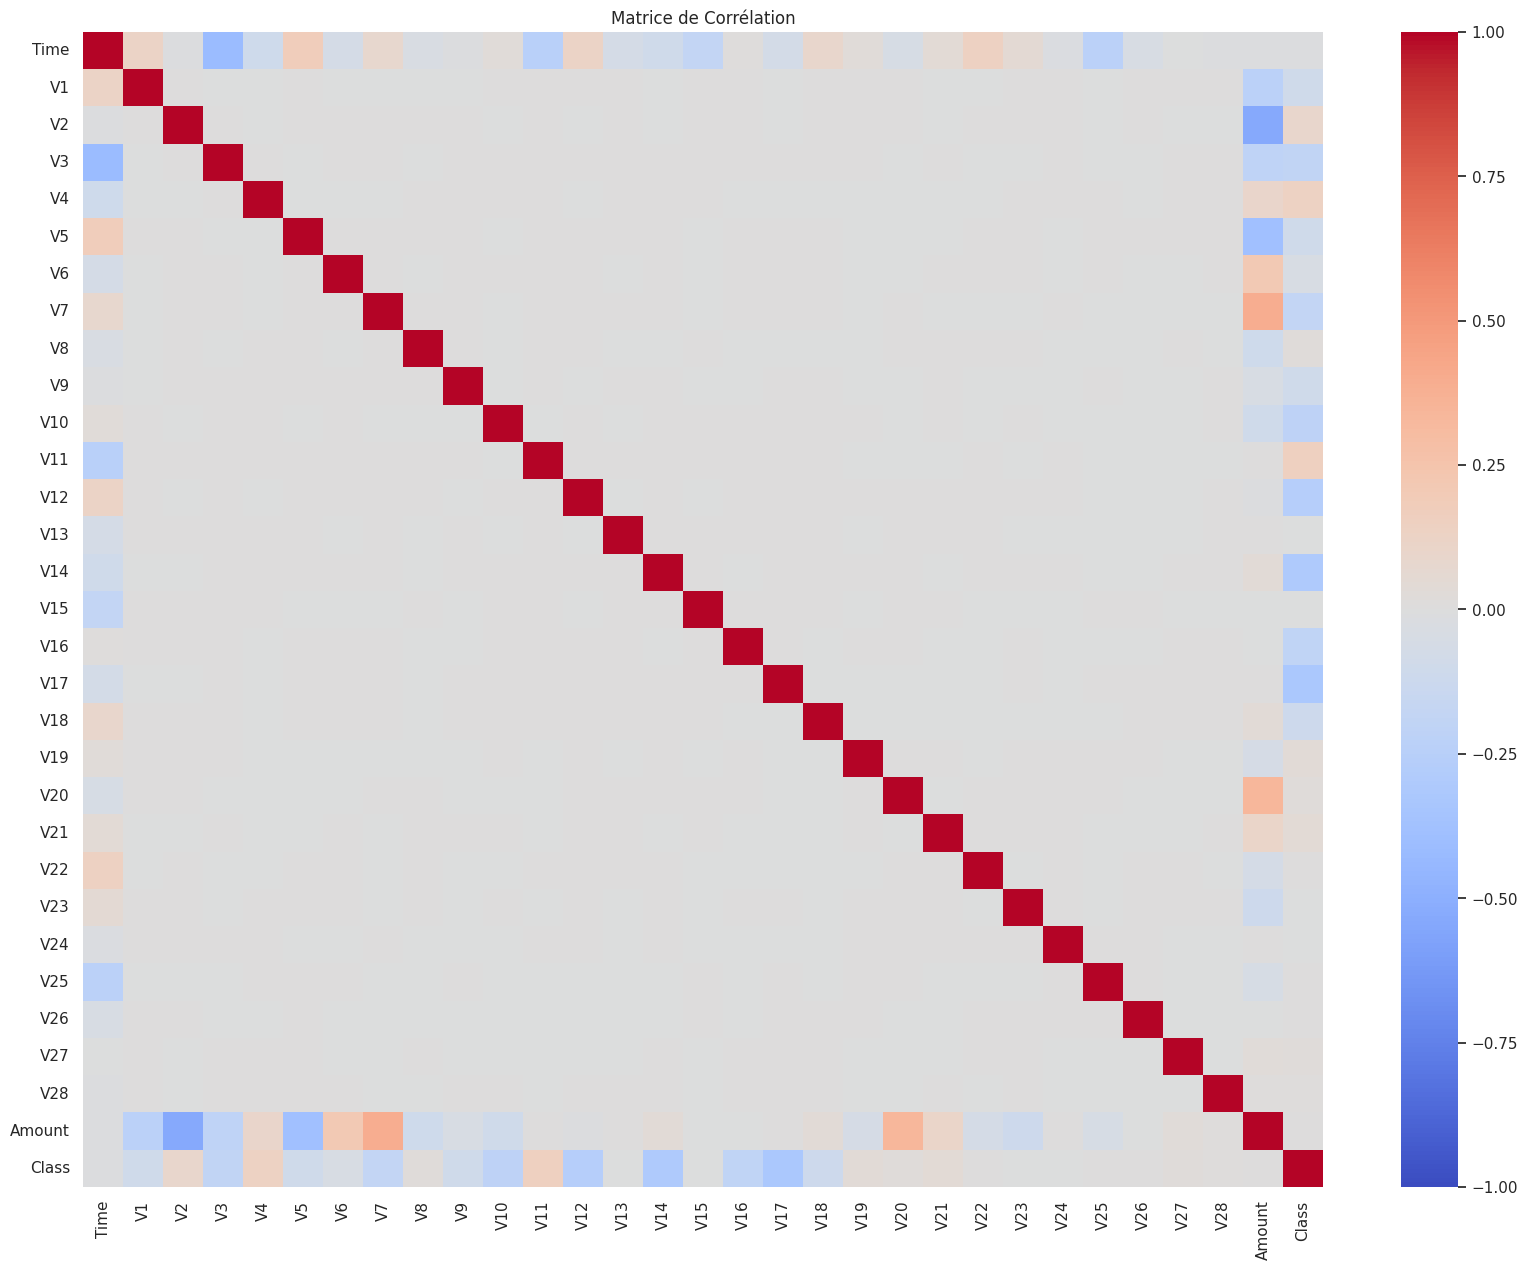

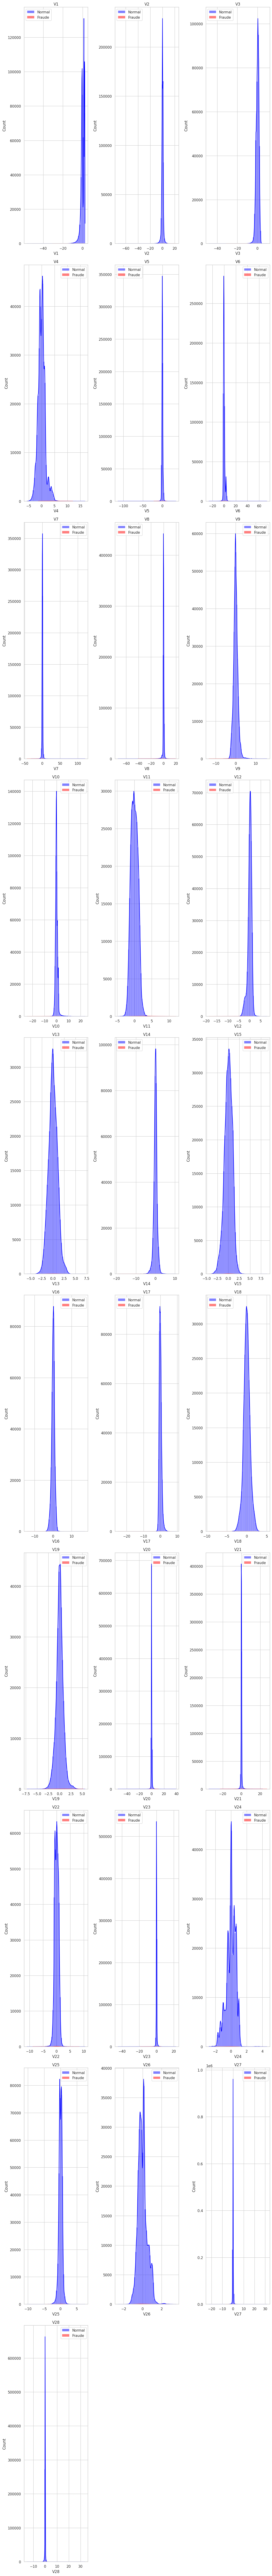

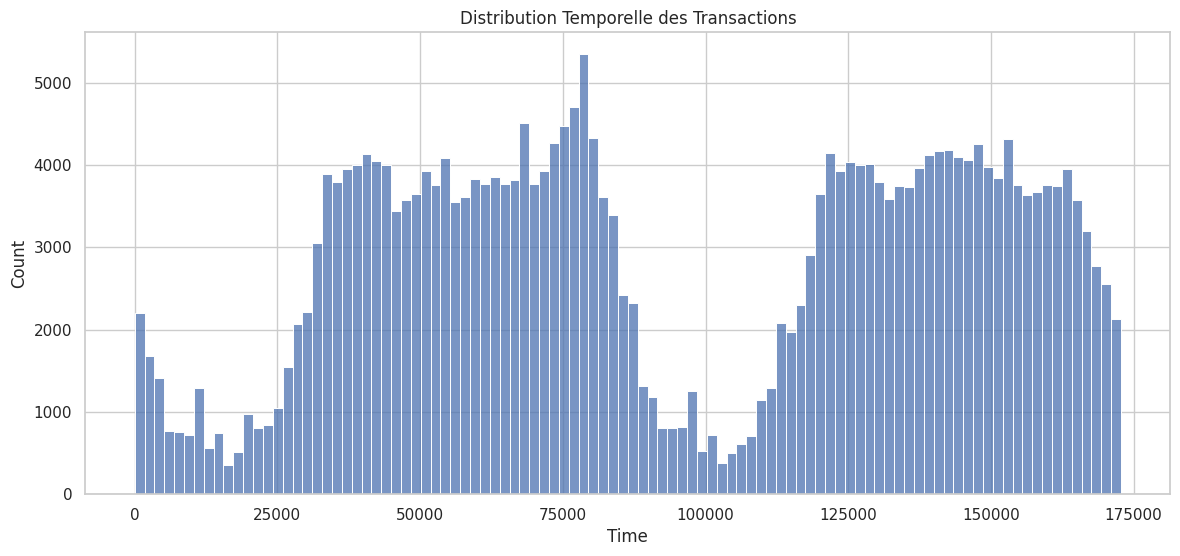

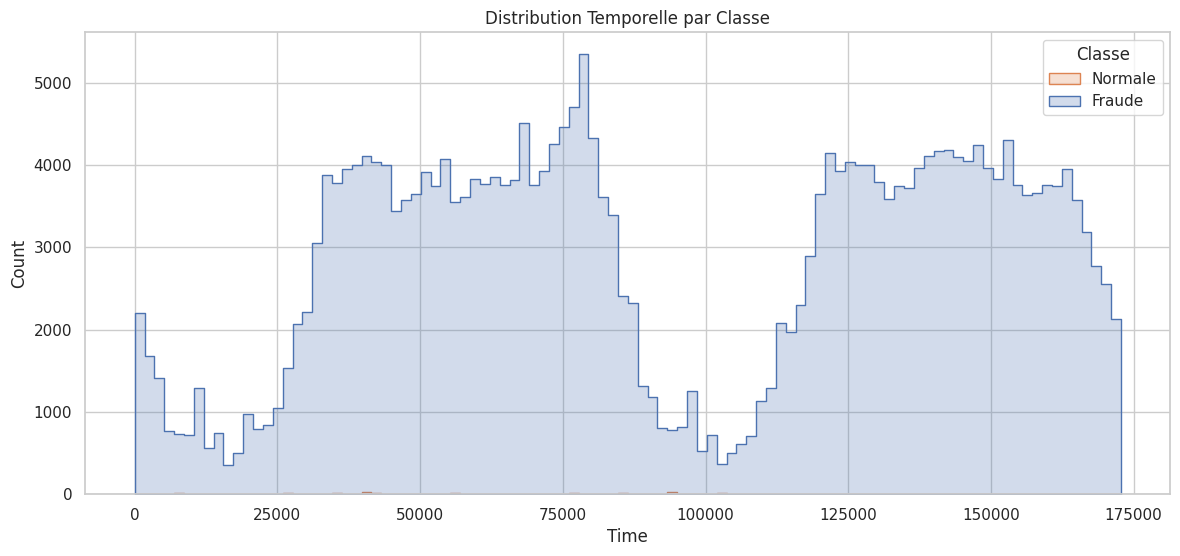

Moyenne des montants - Transactions normales : 88.29102242231328
Moyenne des montants - Fraudes : 122.21132113821139

Médiane des montants - Transactions normales : 22.0
Médiane des montants - Fraudes : 9.25
Taille de l'ensemble d'entraînement : (227845, 30)
Taille de l'ensemble de test : (56962, 30)
Dimensions de l'ensemble d'entraînement : (227845, 30)
Dimensions de l'ensemble de test : (56962, 30)

Distribution des classes dans l'ensemble d'entraînement :
 Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64

Distribution des classes dans l'ensemble de test :
 Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


In [ ]:

# - Exploration des Données
# 
# ## Contexte
# L'objectif est d'identifier les transactions frauduleuses parmi les transactions de cartes de crédit. Le jeu de données est très déséquilibré, avec seulement 0,172% de transactions frauduleuses.


# Importations des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)


# Chargement des données
df = pd.read_csv('../data/raw/creditcard.csv')

# Affichage des premières lignes
print("Dimensions du dataset :", df.shape)
df.head()


# Informations sur les données
df.info()


# Statistiques descriptives
df.describe()


# Vérification des valeurs manquantes
df.isnull().sum()


# Distribution des classes
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribution des Transactions Normales (0) vs Fraudes (1)')
plt.show()


# Pourcentage de chaque classe
print("Pourcentage de transactions normales: {:.4f}%".format(
    len(df[df['Class'] == 0]) / len(df) * 100))
print("Pourcentage de fraudes: {:.4f}%".format(
    len(df[df['Class'] == 1]) / len(df) * 100))


# Distribution des montants
plt.figure(figsize=(12, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution des Montants de Transaction')
plt.xlim((0, 2000))  # Limite pour une meilleure visualisation
plt.show()


# Distribution des montants par classe
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.ylim((0, 300))
plt.title('Distribution des Montants par Classe')
plt.show()


# Matrice de corrélation
corr = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation')
plt.show()


# Analyse des composantes principales (V1-V28)
v_features = df.iloc[:, 1:29].columns

plt.figure(figsize=(12, 28*4))
for i, col in enumerate(v_features):
    plt.subplot(10, 3, i+1)
    sns.histplot(df[col][df['Class'] == 0], bins=50, color='blue', label='Normal', kde=True)
    sns.histplot(df[col][df['Class'] == 1], bins=50, color='red', label='Fraude', kde=True)
    plt.legend()
    plt.title(col)
plt.tight_layout()
plt.show()


# Distribution temporelle des transactions
plt.figure(figsize=(14, 6))
sns.histplot(df['Time'], bins=100)
plt.title('Distribution Temporelle des Transactions')
plt.show()


# Distribution temporelle par classe
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x='Time', hue='Class', bins=100, element='step')
plt.title('Distribution Temporelle par Classe')
plt.legend(title='Classe', labels=['Normale', 'Fraude'])
plt.show()


# Analyse des montants par classe
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

print("Moyenne des montants - Transactions normales :", normal['Amount'].mean())
print("Moyenne des montants - Fraudes :", fraud['Amount'].mean())
print("\nMédiane des montants - Transactions normales :", normal['Amount'].median())
print("Médiane des montants - Fraudes :", fraud['Amount'].median())


# Sauvegarde des données traitées
df.to_csv('../data/processed/creditcard_processed.csv', index=False)


# Préparation des données pour le modèle
X = df.drop('Class', axis=1)
y = df['Class']

# Normalisation des caractéristiques 'Time' et 'Amount'
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# Séparation en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Taille de l'ensemble d'entraînement :", X_train.shape)
print("Taille de l'ensemble de test :", X_test.shape)

# Sauvegarde des ensembles de données
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

# Affichage des dimensions des ensembles de données
print("Dimensions de l'ensemble d'entraînement :", X_train.shape)
print("Dimensions de l'ensemble de test :", X_test.shape)
print("\nDistribution des classes dans l'ensemble d'entraînement :\n", y_train.value_counts(normalize=True))
print("\nDistribution des classes dans l'ensemble de test :\n", y_test.value_counts(normalize=True))